# Plot results

This notebook plots some summarizations of the `results.txt` file generated by the other notebook in this folder.

In [4]:
from __future__ import print_function

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib inline

font = {'family' : 'DejaVu Sans',
        'size'   : 20}
matplotlib.rc('font', **font)

In [13]:
df1 = pd.read_csv('../results_hospmort.csv')
df2 = pd.read_csv('../results_othermort.csv')
df = pd.concat([df1, df2])
df.head()

,Cohort,N_Study,N_Repro.,Y_Study,Y_Repro.,Model,Study,GB,LR,Notes
0,caballero2015dynamically $W$=24,11648,11648,-,13.01,NonLin,0.8657,0.9060,0.88616,KF
1,caballero2015dynamically $W$=48,11648,11648,-,13.01,NonLin,0.7985,0.9227,0.9034,KF
2,caballero2015dynamically $W$=72,11648,11648,-,13.01,NonLin,0.7385,0.9314,0.9144,KF
3,calvert2016computational,3054,1985,12.84,13.80,NonLin,0.9340,0.9565,0.9025,Kernel
4,calvert2016using,9683,18396,10.68,14.71,NonLin,0.8800,0.9333,0.9110,Kernal


In [14]:
# exclude studies which had a fixed sample size
studies_ignore = ['caballero2015dynamically $W$=24',
                  'caballero2015dynamically $W$=48',
                  'caballero2015dynamically $W$=72']

idxIgnore = np.in1d(df['Cohort'], studies_ignore)

In [31]:
df.loc[~idxIgnore,'N_Repro.']/df.loc[~idxIgnore,'N_Study']

3     0.649967
4     1.899824
5     3.386429
6     1.569507
7     1.000000
8     1.000000
9     1.459084
10    1.214108
11    2.153401
12    0.946486
13    1.076095
14    1.260145
15    1.000000
16    1.000000
17    1.062587
18    1.198456
19    1.474863
20    1.174922
21    1.124376
0     1.344628
1     1.062587
2     1.135826
3     1.559294
4     1.459084
5     0.946486
6     1.198456
7     1.198456
8     1.366779
9     1.507006
10    1.048404
11    1.507006
12    1.459084
13    2.153401
14    0.946486
15    1.366779
dtype: float64

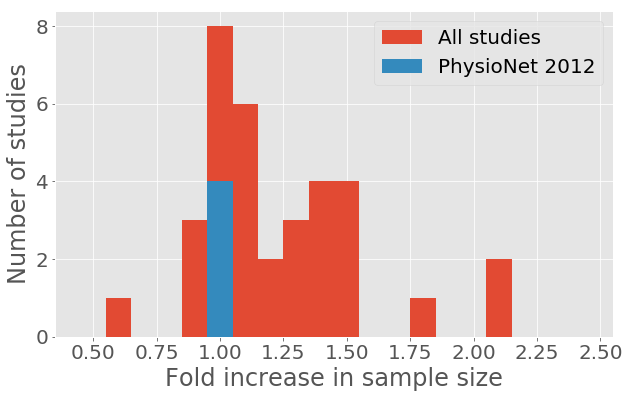

In [34]:
# plot bar chart
xi = np.arange(0.5, 2.6, 0.1)
plt.figure(figsize=[10,6])
plt.hist(df.loc[~idxIgnore,'N_Repro.']/df.loc[~idxIgnore,'N_Study'], bins=xi,
         align='left',label='All studies')

# overlay the physionet 2012 datasets
studies_pn2012 = ['che2016recurrent (b)','ding2016mortality',
                 'johnson2012patient', 'johnson2014data']
idxShow = np.in1d(df['Cohort'], studies_pn2012)
plt.hist(df.loc[idxShow,'N_Repro.']/df.loc[idxShow,'N_Study'], bins=xi,
         align='left',label='PhysioNet 2012')

plt.ylabel('Number of studies')
plt.xlabel('Fold increase in sample size')

plt.legend(loc='upper right')

plt.show()